In [71]:
# Supervised Learning - Tree Based Models - Multi Tree Models or Ensemble
# Methods - 2) Boosting - Algorithm is Gradient Boosting Machine
# Boosting algorithms are designed to work or focus on weak learners or
# wrong predictions.
# Step 1 - Specify the number of trees to be built (n_estimators=1000)
# Step 2 - Create Sample 1 which is 65% of randomly selected observations
# and sqrt(number of variables) randomly selected.
# Step 3 - Upon completion of Sample 1, Decision Tree 1 is built and 
# predictions generated for the tree
# Step 4 - Identify wrong predictions or weak learners and move them to 
# Sample 2.
# Step 5 - Replenish Sample 2 and build decision tree 2 and also 
# predict for tree.
# Step 6 - Identify wrong predictione or weaklearners and move them to
# Sample 3 
# so on ......

# Sequential Building of Trees as each tree is dependent on previous trees
# for Sample.

# Gradient Descent Algorithm for optimization of coefficients or weights
# Gradient Descent is defined as one of the most commonly used iterative 
# optimization algorithms of machine learning to train the machine 
# learning and deep learning models. 
# It helps in finding the local minimum of a function.
# Reduce weights in smaller proportions over multiple iterations to reach
# local minimum. Error cannot be made zero.

# Learning rate must be greater than 0

# Splitting Methods are same as Decision Tree for both Random Forest &
# Gradient Boosting. But Gradient Boosting in Python uses Log Loss as
# primary splitting method.

# Agrregate all Predictions and if problem is 
# Classification - Majority Voting
# Regression - Average is done


# A decision tree is a simple, decision making-diagram.
# Random forests are a large number of trees, combined (using averages or 
# “majority rules”) at the end of the process.
# Gradient boosting machines also combine decision trees, but start the 
# combining process at the beginning, instead of at the end.

# Boosting algorithms are primarily designed to improve accuracy of the
# models
# Both Regression, Classification and also provides Feature or Variable
# Importance
# Non Parametric Algorithm

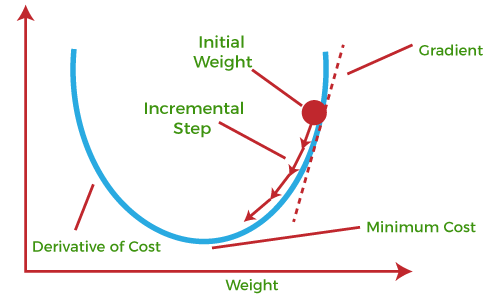
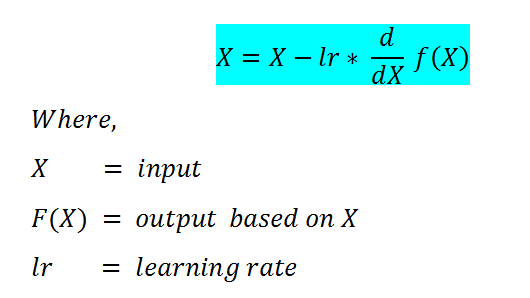
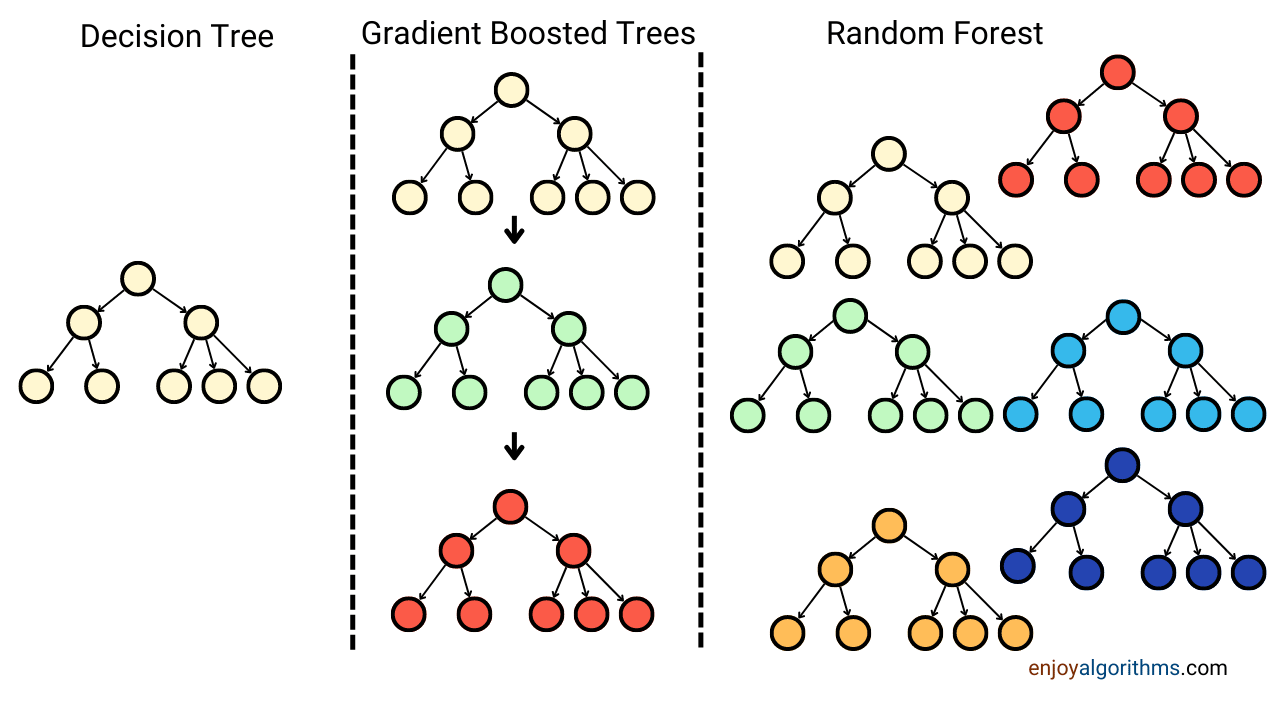

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
import io
%cd '/Users/rajeshprabhakarkaila/Desktop/Datasets'

/Users/rajeshprabhakarkaila/Desktop/Datasets


In [74]:
medicare=pd.read_csv("MUP_PHY_R23_P05_V10_D21_Geo.csv",low_memory=False)

In [75]:
medicare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271635 entries, 0 to 271634
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Rndrng_Prvdr_Geo_Lvl   271635 non-null  object 
 1   Rndrng_Prvdr_Geo_Cd    258353 non-null  object 
 2   Rndrng_Prvdr_Geo_Desc  271635 non-null  object 
 3   HCPCS_Cd               271635 non-null  object 
 4   HCPCS_Desc             271635 non-null  object 
 5   HCPCS_Drug_Ind         271635 non-null  object 
 6   Place_Of_Srvc          271635 non-null  object 
 7   Tot_Rndrng_Prvdrs      271635 non-null  int64  
 8   Tot_Benes              271635 non-null  int64  
 9   Tot_Srvcs              271635 non-null  float64
 10  Tot_Bene_Day_Srvcs     271635 non-null  int64  
 11  Avg_Sbmtd_Chrg         271635 non-null  float64
 12  Avg_Mdcr_Alowd_Amt     271635 non-null  float64
 13  Avg_Mdcr_Pymt_Amt      271635 non-null  float64
 14  Avg_Mdcr_Stdzd_Amt     271635 non-nu

In [76]:
# Drop Duplicate Variable and also NLP Text Variables
medicare=medicare.drop(['Rndrng_Prvdr_Geo_Cd','HCPCS_Cd','HCPCS_Desc'],
                      axis=1)

In [77]:
# Split Data into numeric and object columns/variables
numcols=medicare.select_dtypes(include=np.number)
objcols=medicare.select_dtypes(include=['object'])

In [78]:
print(numcols.shape)
print(objcols.shape)

(271635, 8)
(271635, 4)


In [79]:
numcols.head()

,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
0,279,25735,26341.0,26341,42.415088,20.884538,20.884538,20.815810
1,57563,9080086,9346114.7,9345929,44.186609,25.759089,25.759086,25.205064
2,187,24576,24649.0,24649,65.965120,31.794918,31.794918,31.521371
3,52326,8897346,8994332.2,8994143,53.747218,35.085090,35.085090,34.497677
4,211,5364,5371.0,5371,69.139801,38.653349,38.653349,39.183323


In [80]:
# Check for Multicollinearity
numcols.corr()

,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
Tot_Rndrng_Prvdrs,1.000000,0.685156,0.392200,0.698055,-0.019574,-0.014934,-0.015018,-0.014993
Tot_Benes,0.685156,1.000000,0.479181,0.846001,-0.019822,-0.013196,-0.013083,-0.012996
Tot_Srvcs,0.392200,0.479181,1.000000,0.570929,-0.018037,-0.012290,-0.012242,-0.012142
Tot_Bene_Day_Srvcs,0.698055,0.846001,0.570929,1.000000,-0.014617,-0.009580,-0.009560,-0.009489
Avg_Sbmtd_Chrg,-0.019574,-0.019822,-0.018037,-0.014617,1.000000,0.785956,0.784406,0.775097
Avg_Mdcr_Alowd_Amt,-0.014934,-0.013196,-0.012290,-0.009580,0.785956,1.000000,0.999635,0.996425
Avg_Mdcr_Pymt_Amt,-0.015018,-0.013083,-0.012242,-0.009560,0.784406,0.999635,1.000000,0.996899
Avg_Mdcr_Stdzd_Amt,-0.014993,-0.012996,-0.012142,-0.009489,0.775097,0.996425,0.996899,1.000000


<Axes: >

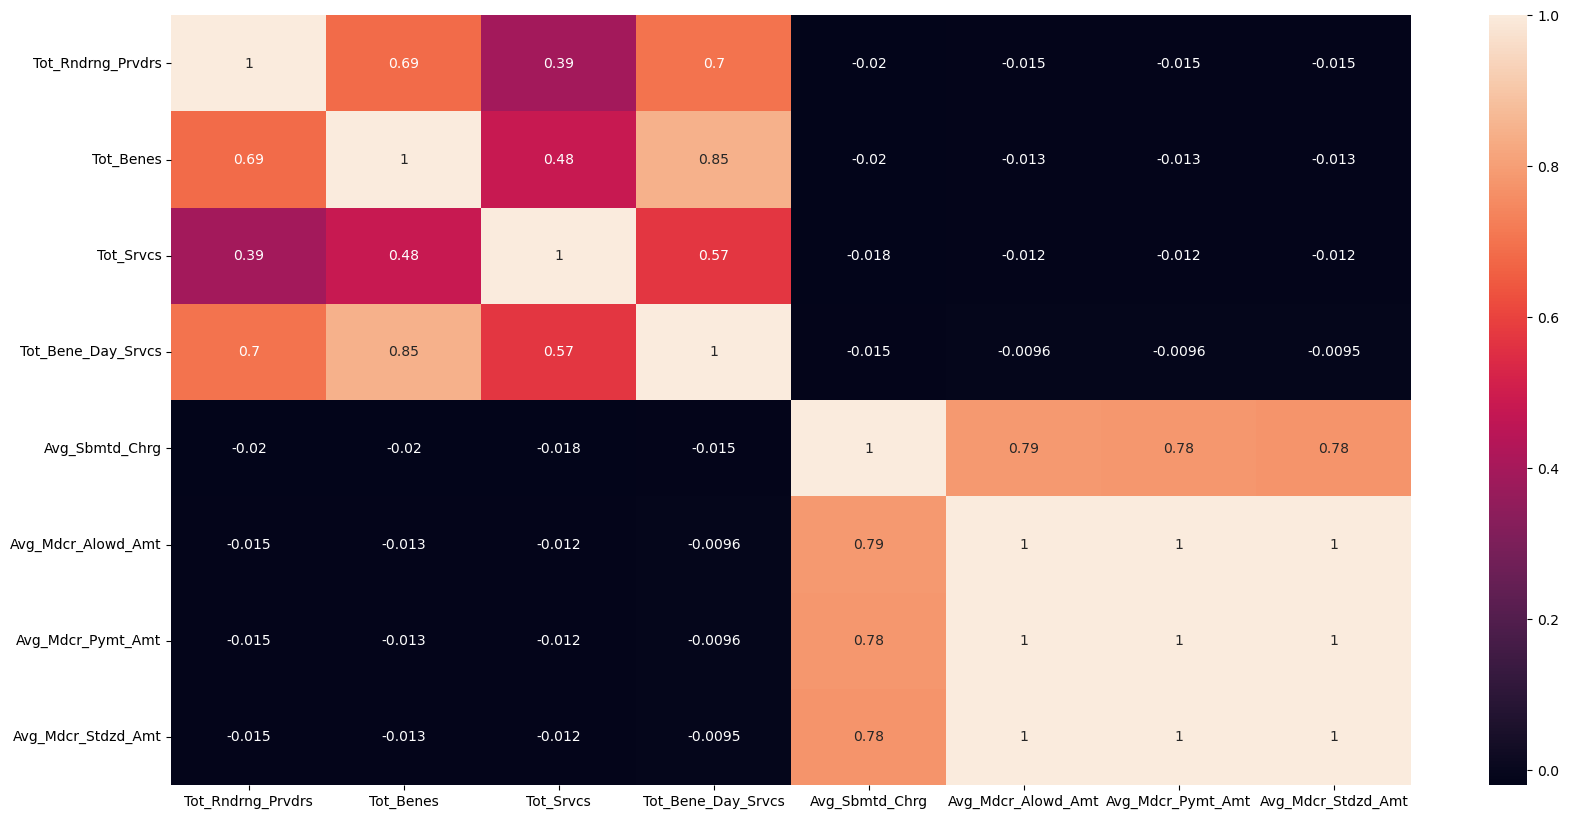

In [81]:
plt.figure(figsize=(20,10))
sns.heatmap(numcols.corr(),annot=True)

In [82]:
numcols=numcols.drop(['Avg_Mdcr_Alowd_Amt','Avg_Mdcr_Stdzd_Amt'],axis=1)

In [83]:
import seaborn as sns

<Axes: >

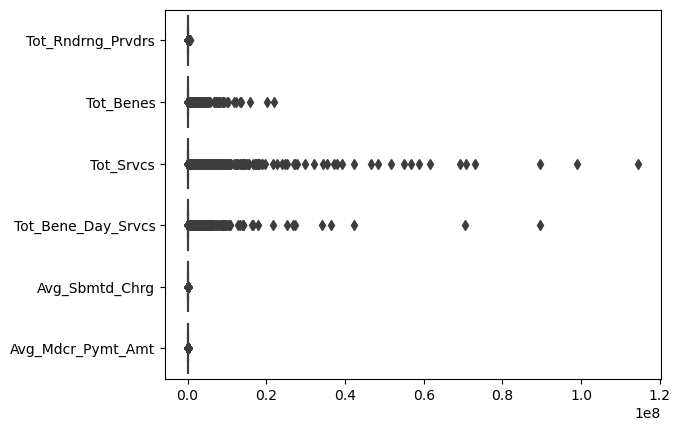

In [84]:
sns.boxplot(numcols,orient="h")

In [85]:
# Scale numcols
from sklearn.preprocessing import MinMaxScaler

In [86]:
minmax=MinMaxScaler()

In [87]:
y=numcols.Avg_Mdcr_Pymt_Amt

In [88]:
numcols=numcols.drop('Avg_Mdcr_Pymt_Amt',axis=1)

In [89]:
numcols_minmax=minmax.fit_transform(numcols)

In [90]:
numcols_minmax=pd.DataFrame(numcols_minmax,columns=numcols.columns)

In [91]:
# Dummyencode Object Cols
objcols_dummy=pd.get_dummies(objcols)

In [92]:
medicare_df=pd.concat([numcols_minmax,objcols_dummy],axis=1)

In [93]:
medicare.columns

Index(['Rndrng_Prvdr_Geo_Lvl', 'Rndrng_Prvdr_Geo_Desc', 'HCPCS_Drug_Ind',
       'Place_Of_Srvc', 'Tot_Rndrng_Prvdrs', 'Tot_Benes', 'Tot_Srvcs',
       'Tot_Bene_Day_Srvcs', 'Avg_Sbmtd_Chrg', 'Avg_Mdcr_Alowd_Amt',
       'Avg_Mdcr_Pymt_Amt', 'Avg_Mdcr_Stdzd_Amt'],
      dtype='object')

In [94]:
# EDA using medicare dataframe
# Pie Diagram - Rndrng_Prvdr_Geo_Lvl, Place_Of_Srvc,HCPCS_Drug_Ind
# Stacked Bar Plots - Rndrng_Prvdr_Geo_Desc & Place_Of_Srvc,
# Rndrng_Prvdr_Geo_Desc & HCPCS_Drug_Ind
# Barplots - groupby() mean of Rndrng_Prvdr_Geo_Desc & Tot_Benes,
# Rndrng_Prvdr_Geo_Desc & Tot_Bene_Day_Srvcs

# Hypothesis Testing
# Test Null Average Avg_Mdcr_Pymt_Amt of Place_Of_Srvc is equal
# Test Null Average Tot_Bene_Day_Srvcs of Place_Of_Srvc is equal
# Test Null Average Avg_Mdcr_Pymt_Amt of Rndrng_Prvdr_Geo_Lvl is equal
# Test Null Average Tot_Srvcs of Rndrng_Prvdr_Geo_Lvl is equal

# Test Null No Association between Rndrng_Prvdr_Geo_Desc & Place_Of_Srvc
# Test Null No Association between Rndrng_Prvdr_Geo_Desc & HCPCS_Drug_Ind

# Boxplot, Histogram and Density Curve of y


<Axes: ylabel='Rndrng_Prvdr_Geo_Lvl'>

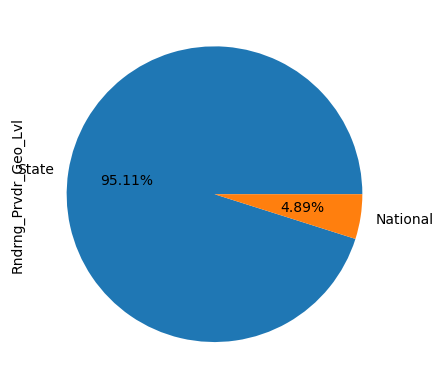

In [95]:
medicare.Rndrng_Prvdr_Geo_Lvl.value_counts().plot(kind="pie",
                                                  autopct="%.2f%%")

<Axes: ylabel='Place_Of_Srvc'>

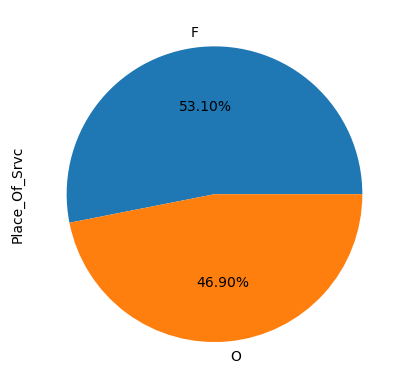

In [96]:
medicare.Place_Of_Srvc.value_counts().plot(kind="pie",
                                                  autopct="%.2f%%")

<Axes: ylabel='HCPCS_Drug_Ind'>

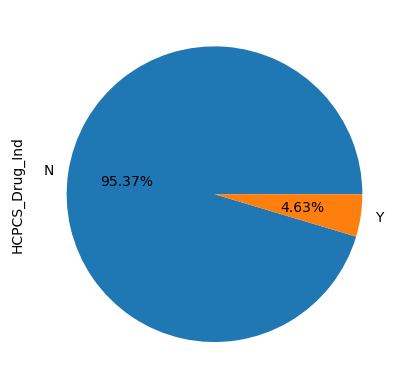

In [97]:
medicare.HCPCS_Drug_Ind.value_counts().plot(kind="pie",
                                                  autopct="%.2f%%")

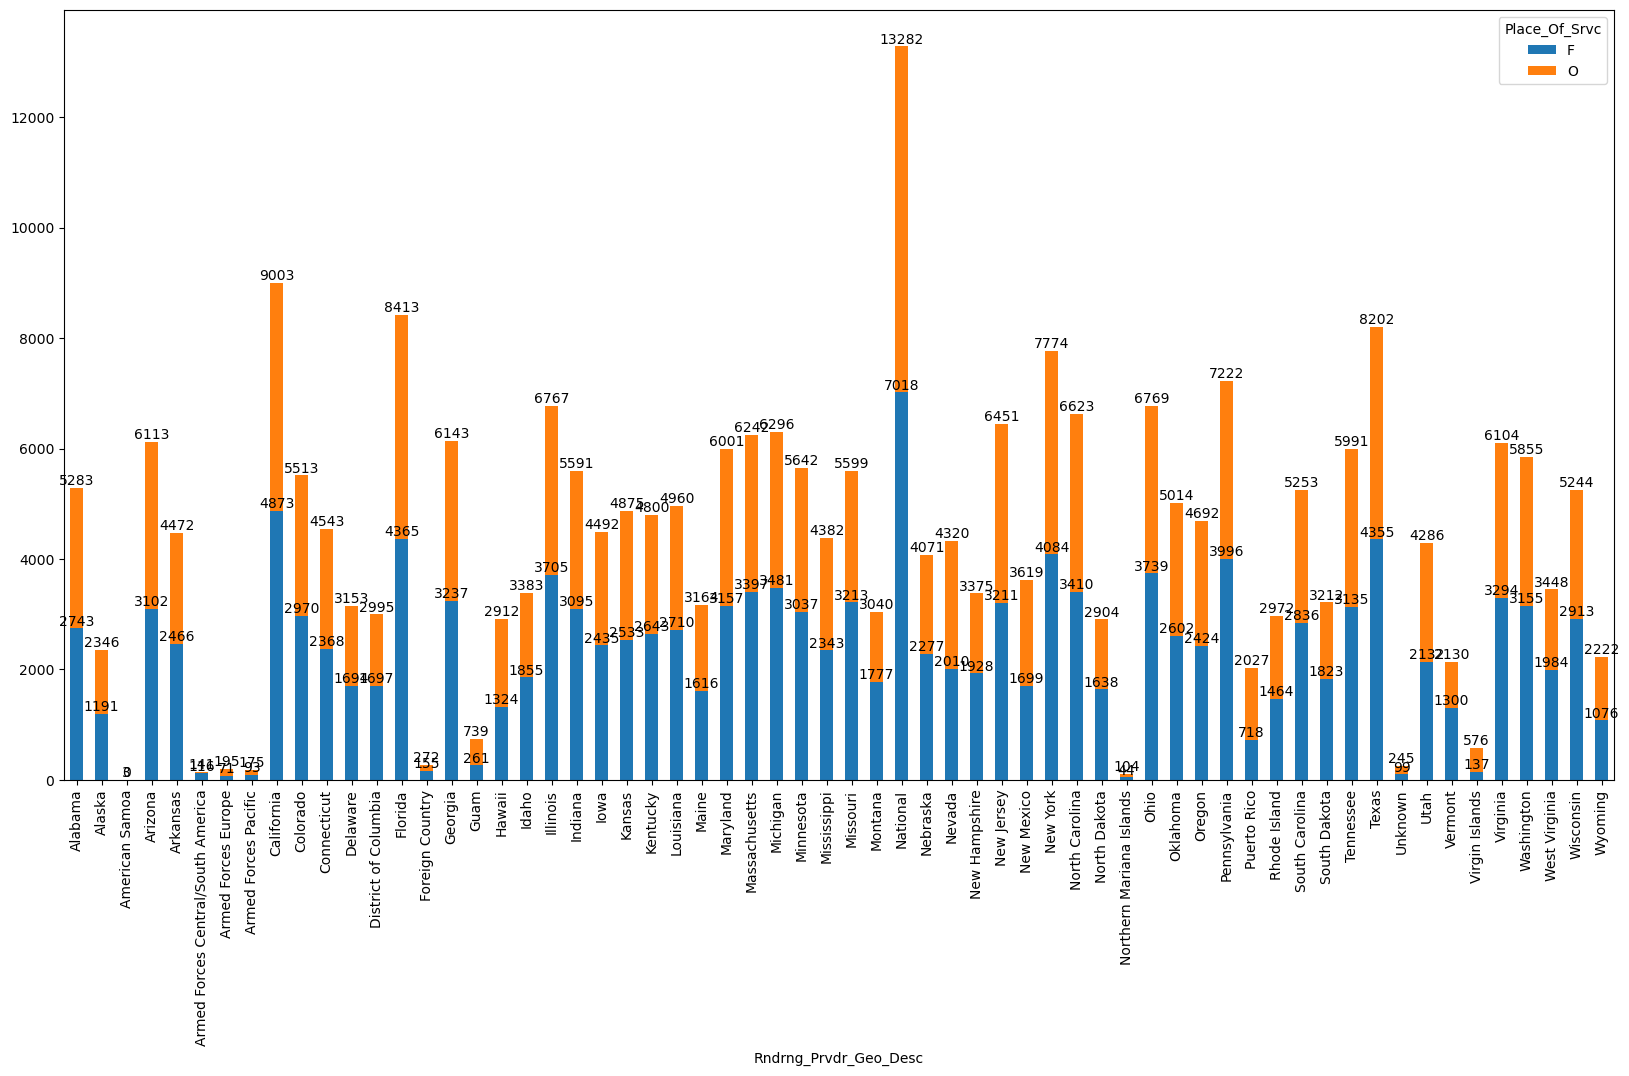

In [106]:
ax=pd.crosstab(medicare.Rndrng_Prvdr_Geo_Desc,
               medicare.Place_Of_Srvc).plot(kind="bar",stacked=True,
                                           figsize=(20,10))
for i in ax.containers:
    ax.bar_label(i,fontsize=10)

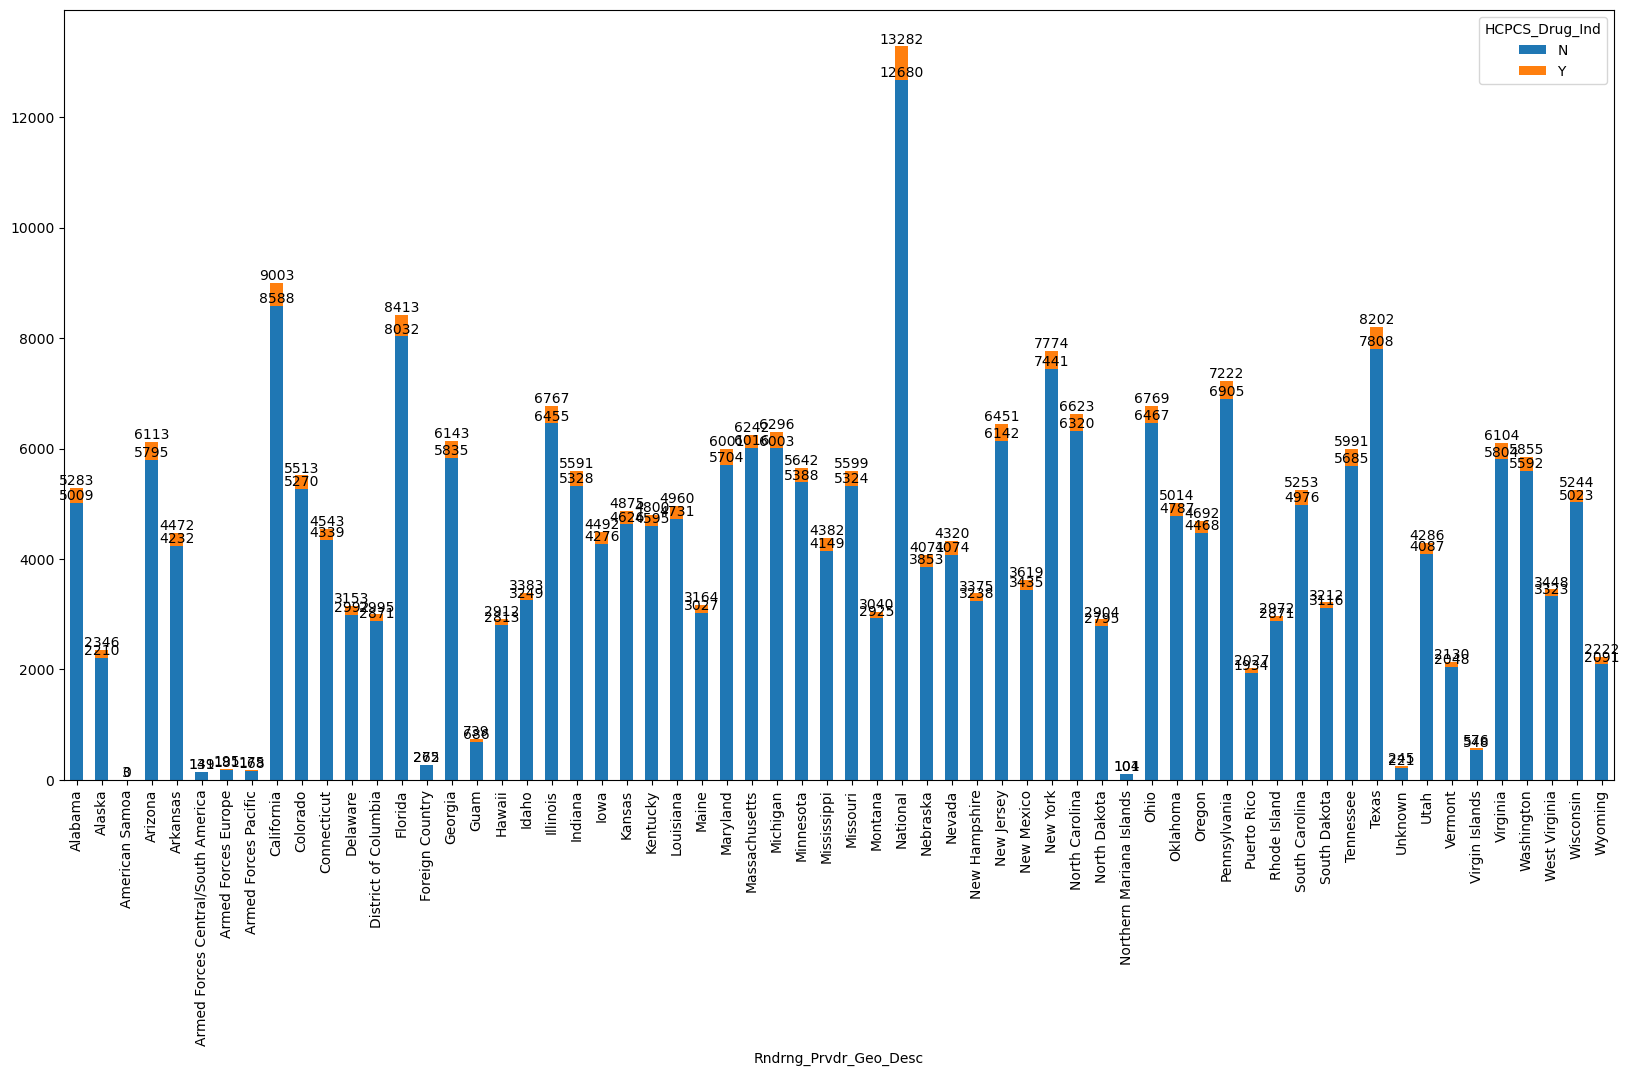

In [107]:
ax=pd.crosstab(medicare.Rndrng_Prvdr_Geo_Desc,
               medicare.HCPCS_Drug_Ind).plot(kind="bar",stacked=True,
                                           figsize=(20,10))
for i in ax.containers:
    ax.bar_label(i,fontsize=10)

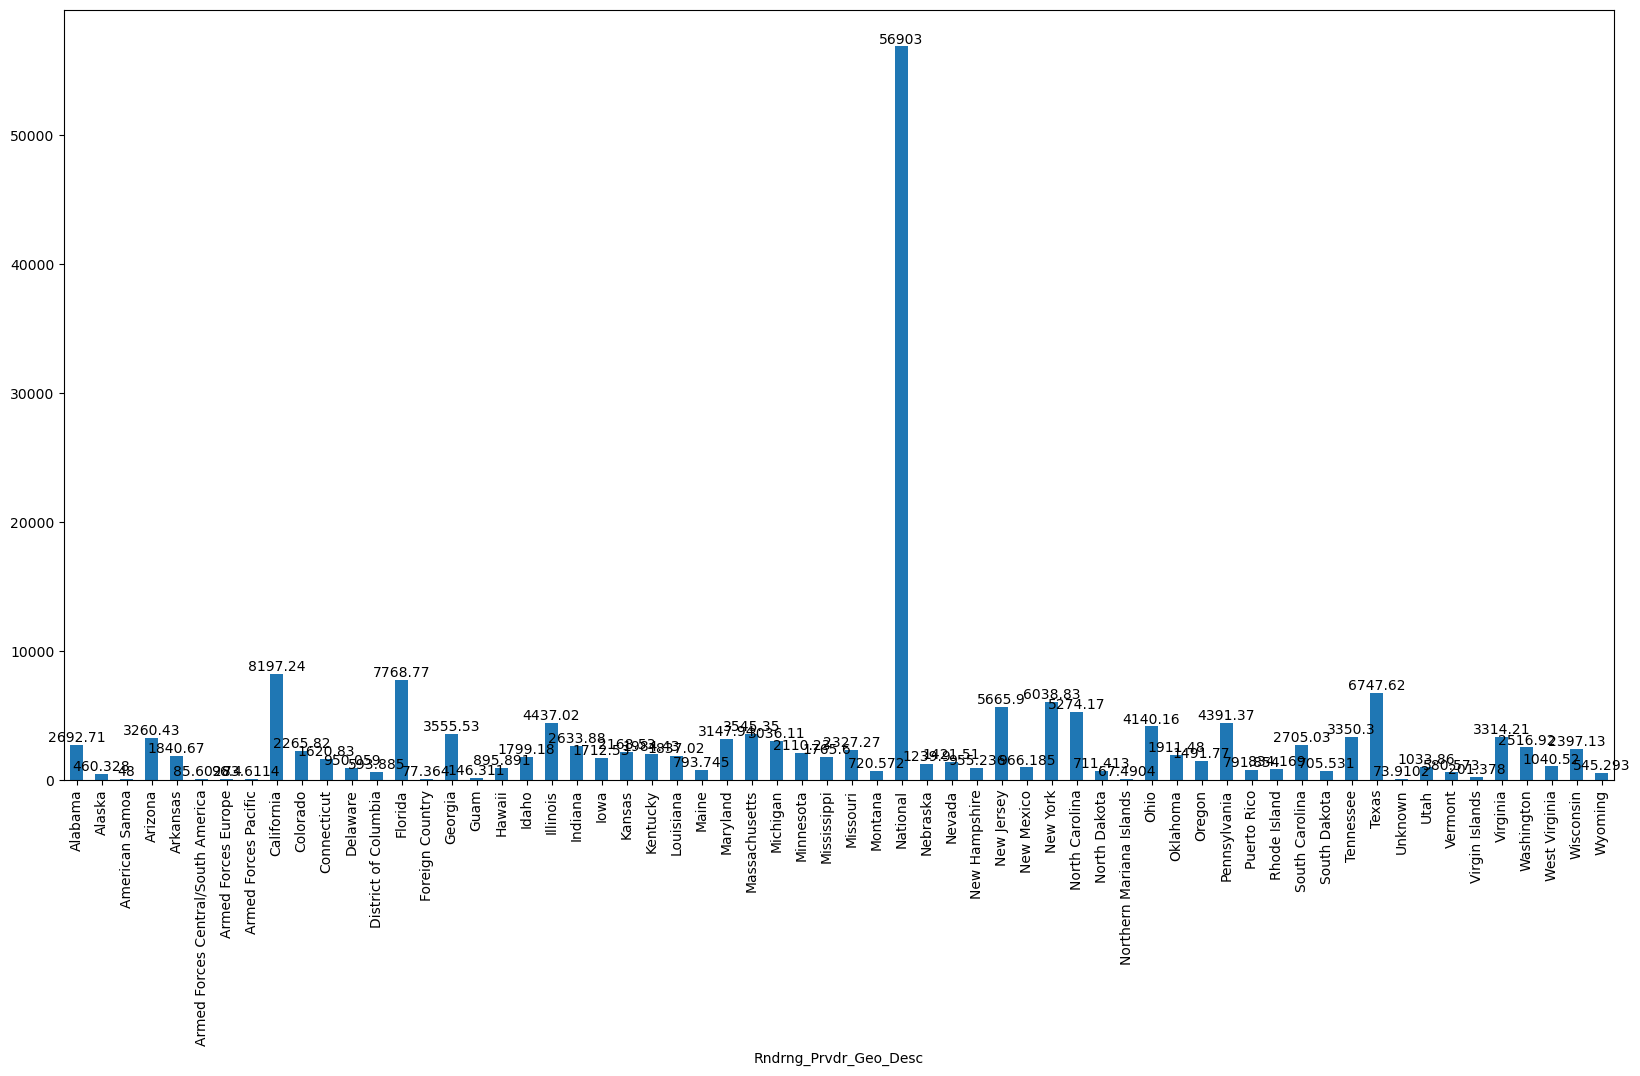

In [108]:
ax=medicare.Tot_Benes.groupby(medicare.Rndrng_Prvdr_Geo_Desc).mean().plot(
    kind="bar",stacked=True,figsize=(20,10))
for i in ax.containers:
    ax.bar_label(i,fontsize=10)

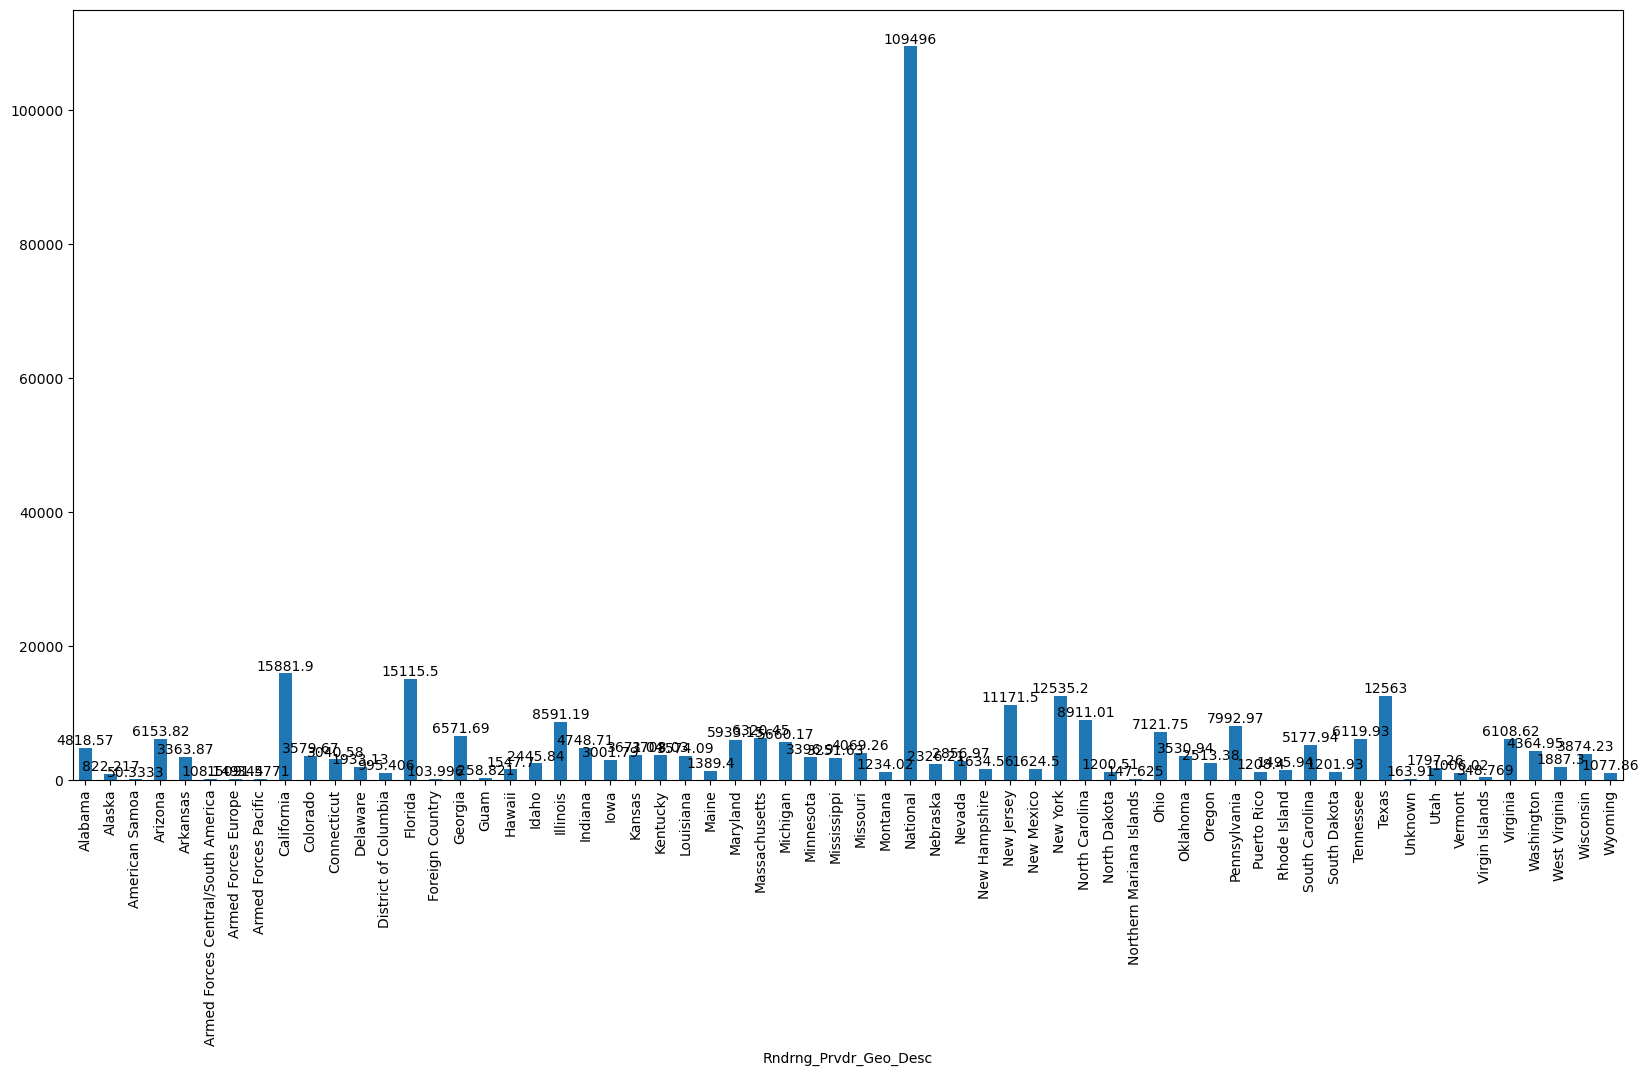

In [109]:
ax=medicare.Tot_Bene_Day_Srvcs.groupby(medicare.Rndrng_Prvdr_Geo_Desc).mean().plot(
    kind="bar",stacked=True,figsize=(20,10))
for i in ax.containers:
    ax.bar_label(i,fontsize=10)

In [110]:
#Test Null Average Avg_Mdcr_Pymt_Amt of Place_Of_Srvc is equal
medicare.Avg_Mdcr_Pymt_Amt.groupby(medicare.Place_Of_Srvc).mean()

Place_Of_Srvc
F    295.256312
O    172.634904
Name: Avg_Mdcr_Pymt_Amt, dtype: float64

In [111]:
medicare.Avg_Mdcr_Pymt_Amt.groupby(medicare.Place_Of_Srvc).var()

Place_Of_Srvc
F    177885.357807
O    655303.629523
Name: Avg_Mdcr_Pymt_Amt, dtype: float64

In [112]:
# Split Data
facility=medicare[medicare.Place_Of_Srvc=='F']
nonfacility=medicare[medicare.Place_Of_Srvc=='O']

In [113]:
from scipy.stats import ttest_ind

In [114]:
ttest_ind(facility.Avg_Mdcr_Pymt_Amt,nonfacility.Avg_Mdcr_Pymt_Amt,
         equal_var=False)
# Since pvalue=0.0 is less tha 0.05, Reject Null
# Null - No Significant difference in Average Avg_Mdcr_Pymt_Amt of
# different Place_Of_Service

Ttest_indResult(statistic=48.558770250734874, pvalue=0.0)

In [115]:
medicare.Tot_Bene_Day_Srvcs.groupby(medicare.Place_Of_Srvc).mean()

Place_Of_Srvc
F     4824.134614
O    17360.911536
Name: Tot_Bene_Day_Srvcs, dtype: float64

In [116]:
medicare.Tot_Bene_Day_Srvcs.groupby(medicare.Place_Of_Srvc).var()

Place_Of_Srvc
F    2.268351e+10
O    1.805518e+11
Name: Tot_Bene_Day_Srvcs, dtype: float64

In [118]:
ttest_ind(facility.Tot_Bene_Day_Srvcs,nonfacility.Tot_Bene_Day_Srvcs,
         equal_var=False)
# Since pvalue=1.6883057820780268e-23 is less than 0.05, Reject Null
# Null - - No Significant difference in Average Tot_Bene_Day_Srvcs of
# different Place_Of_Service

Ttest_indResult(statistic=-9.991472239116112, pvalue=1.6883057820780268e-23)

In [119]:
medicare.Avg_Mdcr_Pymt_Amt.groupby(medicare.Rndrng_Prvdr_Geo_Lvl).mean()

Rndrng_Prvdr_Geo_Lvl
National    333.321047
State       232.828068
Name: Avg_Mdcr_Pymt_Amt, dtype: float64

In [120]:
medicare.Avg_Mdcr_Pymt_Amt.groupby(medicare.Rndrng_Prvdr_Geo_Lvl).var()

Rndrng_Prvdr_Geo_Lvl
National    447812.262755
State       402892.783243
Name: Avg_Mdcr_Pymt_Amt, dtype: float64

In [121]:
national=medicare[medicare.Rndrng_Prvdr_Geo_Lvl=='National']
state=medicare[medicare.Rndrng_Prvdr_Geo_Lvl=='State']

In [122]:
ttest_ind(national.Avg_Mdcr_Pymt_Amt,state.Avg_Mdcr_Pymt_Amt,
          equal_var=False)
# Since pvalue=1.3002203261744678e-63 is less than 0.05, Reject Null
# Null - - No Significant difference in Average Avg_Mdcr_Pymt_Amt of
# different Rndrng_Prvdr_Geo_Lvl

Ttest_indResult(statistic=16.920026237030118, pvalue=1.3002203261744678e-63)

In [123]:
medicare.Tot_Srvcs.groupby(medicare.Rndrng_Prvdr_Geo_Lvl).mean()

Rndrng_Prvdr_Geo_Lvl
National    241898.516428
State        11996.623949
Name: Tot_Srvcs, dtype: float64

In [124]:
medicare.Tot_Srvcs.groupby(medicare.Rndrng_Prvdr_Geo_Lvl).var()

Rndrng_Prvdr_Geo_Lvl
National    7.034174e+12
State       2.117940e+10
Name: Tot_Srvcs, dtype: float64

In [125]:
ttest_ind(national.Tot_Srvcs,state.Tot_Srvcs,equal_var=False)
# Since pvalue=2.0538020313171456e-23 is less than 0.05, Reject Null
# Null - - No Significant difference in Average Tot_Srvcs of
# different Rndrng_Prvdr_Geo_Lvl

Ttest_indResult(statistic=9.989278714308888, pvalue=2.0538020313171456e-23)

In [126]:
pd.crosstab(medicare.Rndrng_Prvdr_Geo_Desc,medicare.Place_Of_Srvc)

Place_Of_Srvc,F,O
Rndrng_Prvdr_Geo_Desc,,
Alabama,2743,2540
Alaska,1191,1155
American Samoa,3,0
Arizona,3102,3011
Arkansas,2466,2006
...,...,...
Virginia,3294,2810
Washington,3155,2700
West Virginia,1984,1464


In [127]:
from scipy.stats import chi2_contingency

In [128]:
chi2_contingency(pd.crosstab(medicare.Rndrng_Prvdr_Geo_Desc,
                             medicare.Place_Of_Srvc))
# Since pvalue=8.877146268627805e-238 is less than 0.05, Reject Null
# No Association between both variables

Chi2ContingencyResult(statistic=1329.3037975195648, pvalue=8.877146268627805e-238, dof=61, expected_freq=array([[2.80505546e+03, 2.47794454e+03],
       [1.24562940e+03, 1.10037060e+03],
       [1.59287647e+00, 1.40712353e+00],
       [3.24575129e+03, 2.86724871e+03],
       [2.37444786e+03, 2.09755214e+03],
       [7.48651941e+01, 6.61348059e+01],
       [1.03536971e+02, 9.14630294e+01],
       [9.29177941e+01, 8.20822059e+01],
       [4.78022229e+03, 4.22277771e+03],
       [2.92717599e+03, 2.58582401e+03],
       [2.41214593e+03, 2.13085407e+03],
       [1.67411317e+03, 1.47888683e+03],
       [1.59022168e+03, 1.40477832e+03],
       [4.46695658e+03, 3.94604342e+03],
       [1.44420800e+02, 1.27579200e+02],
       [3.26168005e+03, 2.88131995e+03],
       [3.92378571e+02, 3.46621429e+02],
       [1.54615209e+03, 1.36584791e+03],
       [1.79623370e+03, 1.58676630e+03],
       [3.59299836e+03, 3.17400164e+03],
       [2.96859078e+03, 2.62240922e+03],
       [2.38506703e+03, 2.10693297

In [129]:
pd.crosstab(medicare.Rndrng_Prvdr_Geo_Desc,medicare.HCPCS_Drug_Ind)

HCPCS_Drug_Ind,N,Y
Rndrng_Prvdr_Geo_Desc,,
Alabama,5009,274
Alaska,2210,136
American Samoa,3,0
Arizona,5795,318
Arkansas,4232,240
...,...,...
Virginia,5804,300
Washington,5592,263
West Virginia,3323,125


In [130]:
chi2_contingency(pd.crosstab(medicare.Rndrng_Prvdr_Geo_Desc,
                             medicare.HCPCS_Drug_Ind))
# Since pvalue=2.0847341858677072e-16 is less than 0.05, Reject Null
# No Association between both variables

Chi2ContingencyResult(statistic=198.1620393612475, pvalue=2.0847341858677072e-16, dof=61, expected_freq=array([[5.03837183e+03, 2.44628174e+02],
       [2.23736898e+03, 1.08631023e+02],
       [2.86108565e+00, 1.38914352e-01],
       [5.82993886e+03, 2.83061145e+02],
       [4.26492501e+03, 2.07074994e+02],
       [1.34471025e+02, 6.52897454e+00],
       [1.85970567e+02, 9.02943288e+00],
       [1.66896663e+02, 8.10333720e+00],
       [8.58611803e+03, 4.16881970e+02],
       [5.25772173e+03, 2.55278274e+02],
       [4.33263737e+03, 2.10362634e+02],
       [3.00700102e+03, 1.45998984e+02],
       [2.85631717e+03, 1.38682828e+02],
       [8.02343785e+03, 3.89562148e+02],
       [2.59405099e+02, 1.25949012e+01],
       [5.85854971e+03, 2.84450288e+02],
       [7.04780765e+02, 3.42192354e+01],
       [2.77716047e+03, 1.34839531e+02],
       [3.22635092e+03, 1.56649084e+02],
       [6.45365553e+03, 3.13344473e+02],
       [5.33210995e+03, 2.58890047e+02],
       [4.28399891e+03, 2.08001090e

<Figure size 3000x1500 with 0 Axes>

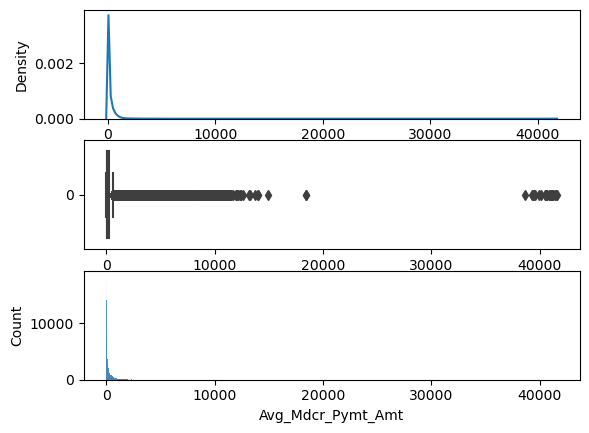

In [131]:
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.kdeplot(y,ax=ax[0])
sns.boxplot(y,orient="h",ax=ax[1])
sns.histplot(y,ax=ax[2])
plt.show()

/Users/rajeshprabhakarkaila/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/rajeshprabhakarkaila/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/rajeshprabhakarkaila/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 3000x1500 with 0 Axes>

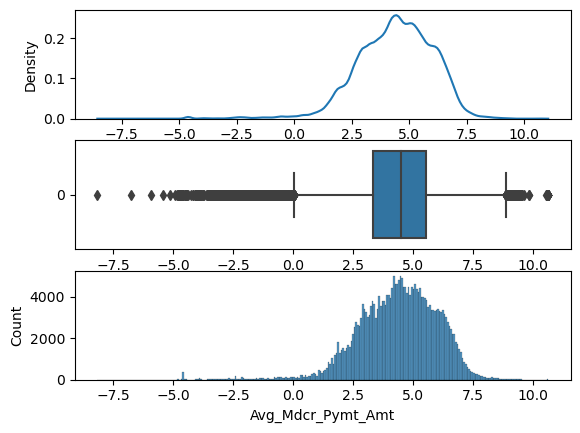

In [132]:
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.kdeplot(np.log(y),ax=ax[0])
sns.boxplot(np.log(y),orient="h",ax=ax[1])
sns.histplot(np.log(y),ax=ax[2])
plt.show()

In [133]:
# Build Multiple Linear Regression Model, DecisionTree Regressor,
# GradientBoostingRegressor, RandomForestRegressor
X=medicare_df

In [134]:
from sklearn.linear_model import LinearRegression

In [135]:
reg=LinearRegression()

In [136]:
regmodel=reg.fit(X,y)

In [137]:
regmodel.score(X,y) # R Square

0.6327431399730188

In [138]:
regpredict=regmodel.predict(X)

In [139]:
regresid=y-regpredict

In [140]:
np.sqrt(np.mean(regresid**2)) # RMSE

385.9314919016739

In [141]:
from sklearn.tree import DecisionTreeRegressor

In [155]:
tree=DecisionTreeRegressor(max_depth=10)

In [156]:
treemodel=tree.fit(X,y)

In [157]:
treemodel.score(X,y)

0.9016023954370195

In [158]:
from sklearn.model_selection import cross_val_score

In [159]:
cross_val_score(tree,X,y)

array([0.82630033, 0.86131378, 0.8888937 , 0.82372636, 0.80278772])

In [160]:
np.mean([0.82630033, 0.86131378, 0.8888937 , 0.82372636, 0.80278772])

0.8406043780000001

In [161]:
treepredict=treemodel.predict(X)

In [162]:
treeresid=y-treepredict

In [163]:
np.sqrt(np.mean(treeresid**2))

199.76413675341453

In [164]:
from sklearn.ensemble import GradientBoostingRegressor

In [165]:
gbm=GradientBoostingRegressor(n_estimators=500)

In [166]:
gbmmodel=gbm.fit(X,y)

In [167]:
gbmmodel.score(X,y) # R Square

0.9100970517679884

In [168]:
gbmpredict=gbmmodel.predict(X)

In [169]:
gbmresid=y-gbmpredict

In [170]:
np.sqrt(np.mean(gbmresid**2)) # RMSE

190.94673068023133